In [12]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import numpy as np
import matplotlib.pyplot as plt
import graphviz
import pandas as pd
from pathlib import Path

In [17]:
# import plotly.express as px
# import cufflinks as cf
# cf.go_offline()

# Example

In [140]:
x = np.linspace(0.01, 100, 10)
y = np.sin(x) + 1 + np.cos(np.abs(x)) + np.log(x)
x = x.reshape(-1, 1)

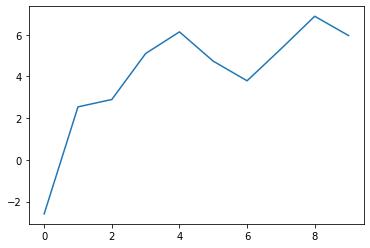

In [82]:
plt.plot(y)

In [ ]:
model = SymbolicRegressor(verbose = 1, population_size = 5000, parsimony_coefficient=0.01,
                          function_set=('add', 'sub', 'mul', 'sin', 'cos', 'log', 'abs'))

model.fit(x, y)

In [84]:
print(model._program)

add(add(add(log(X0), cos(-0.036)), sin(X0)), cos(X0))


In [ ]:
add(add(add(log(X0), cos(-0.036)), sin(X0)), cos(X0))

In [90]:
x_ = np.linspace(10, 20, 100)
y_ = np.sin(x_) + 1 + np.cos(np.abs(x_)) + np.log(x_)
x_ = x_.reshape(-1, 1)

In [91]:
prediction = model.predict(x_)

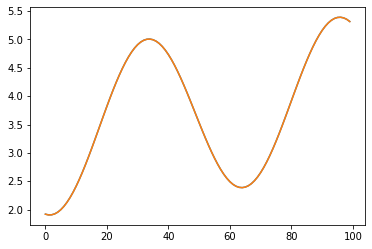

In [93]:
plt.plot(y_)
plt.plot(prediction)

# Rieman's data

In [145]:
#%% Generate X data points
def genX(lmin=0,lmax=10,npoints=29):
    x1 = np.linspace(lmin,lmax,npoints)
    x2 = np.linspace(lmin,lmax,npoints)
    X1,X2 = np.meshgrid(x1,x2)
    x1m = np.ravel(X1.T)
    x2m = np.ravel(X2.T)
    Xm = np.c_[x1m,x2m]
    return Xm

In [146]:
#%% Test function 3
def testfunction3(X,noise=False):
    # Modelo: Y = sin(sqrt(x1^2+x2^2))/sqrt(x1^2+x2^2)+10
    X1 = X[:,0]
    X2 = X[:,1]
    if noise:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)+(0.5*np.random.rand(X.shape[0])-0.25)
    else:
        Y = 10+np.sin(np.sqrt(X1**2+X2**2))/np.sqrt(X1**2+X2**2)
    
    y = np.ravel(Y.T)
    return y

In [147]:
def square(x):
    return np.square(x)

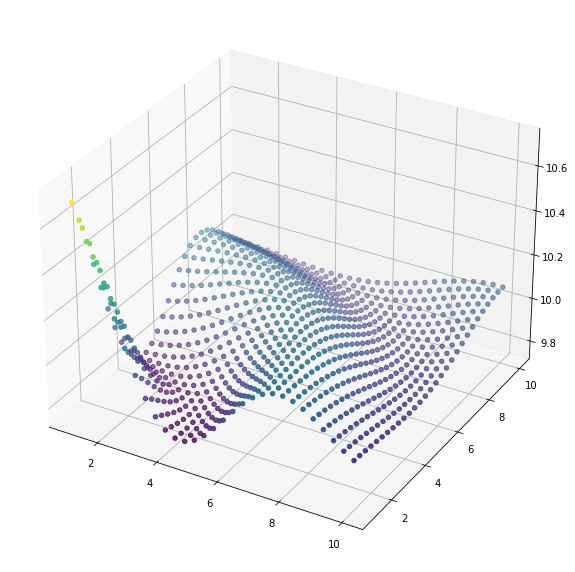

In [148]:
#%% Generacion de un hyperplano
#np.random.seed(1)
lmin = 1
lmax = 10
n = 29
Xm = genX(lmin=lmin,lmax=lmax,npoints=n)
y = testfunction3(X=Xm,noise=False)

nsamples=Xm.shape[0]

#%% Visualizar los datos
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y)
plt.show()

In [98]:
?SymbolicRegressor

In [ ]:
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.1, p_point_mutation=0.1, 
                           const_range = (-1, 10), parsimony_coefficient=0.001

In [150]:
square = make_function(function = square,
              name = "square", 
              arity = 1)

In [199]:
est_gp = SymbolicRegressor(population_size=10000, init_method = "full", 
                           p_crossover=0.7, p_subtree_mutation = 0.2, 
                           const_range = (-10, 10), warm_start = True,
                           function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos', 'sqrt'), 
                           generations=30, stopping_criteria=0.04, parsimony_coefficient=0.0001,
                           max_samples = 0.95,
                           verbose=1, random_state=0)
est_gp.fit(Xm, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    18.92          235.119       12          0.10877         0.104732      6.98m
   1    16.41          11.7445        7        0.0899888        0.0811373      6.87m
   2    16.73          9.66526        6        0.0894736        0.0860106      6.74m
   3    19.07          9.60269        7        0.0887748         0.103668      6.59m
   4    16.42          9.18648       10        0.0879242         0.125675      6.76m
   5    12.45          7.49301       24        0.0865207        0.0887982      5.57m
   6    12.90          6.45106       24        0.0861173        0.0839674      5.45m
   7    11.27          4.75604       30        0.0856008         0.110971      5.14m
   8    10.52          5.65029       36        0.0839849         0.095109  

SymbolicRegressor(const_range=(-10, 10), feature_names=None,
                  function_set=('add', 'sub', 'mul', 'div', 'sin', 'cos',
                                'sqrt'),
                  generations=30, init_depth=(2, 6), init_method='full',
                  low_memory=False, max_samples=0.95,
                  metric='mean absolute error', n_jobs=1, p_crossover=0.7,
                  p_hoist_mutation=0.01, p_point_mutation=0.01,
                  p_point_replace=0.05, p_subtree_mutation=0.2,
                  parsimony_coefficient=0.0001, population_size=10000,
                  random_state=0, stopping_criteria=0.04, tournament_size=20,
                  verbose=1, warm_start=True)

In [200]:
print(est_gp._program)

add(sub(add(4.811, 5.883), div(5.294, 7.544)), div(div(cos(add(add(cos(sin(X1)), mul(div(X0, X1), div(X0, -3.790))), sub(div(sub(X1, 0.412), add(X0, X1)), X1))), sqrt(div(5.294, 7.544))), add(X0, X1)))


In [201]:
predict = est_gp.predict(Xm)

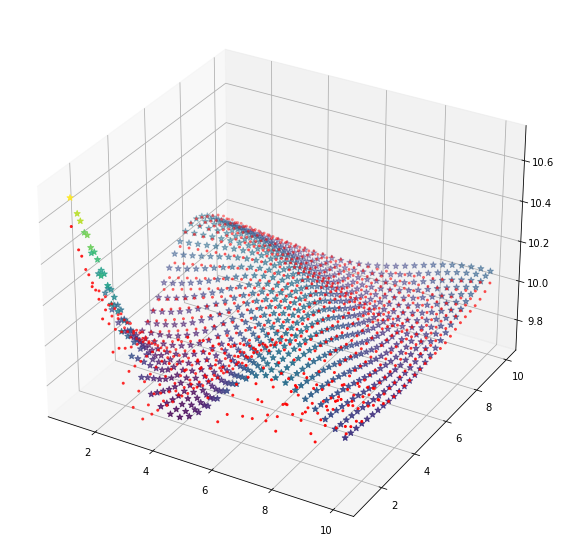

In [206]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xm[:,0],Xm[:,1], y, c=y,s=40, marker = '*')
ax.scatter(Xm[:,0],Xm[:,1], predict, c='r',s=4)
#ax.view_init(30, 0)
plt.show()

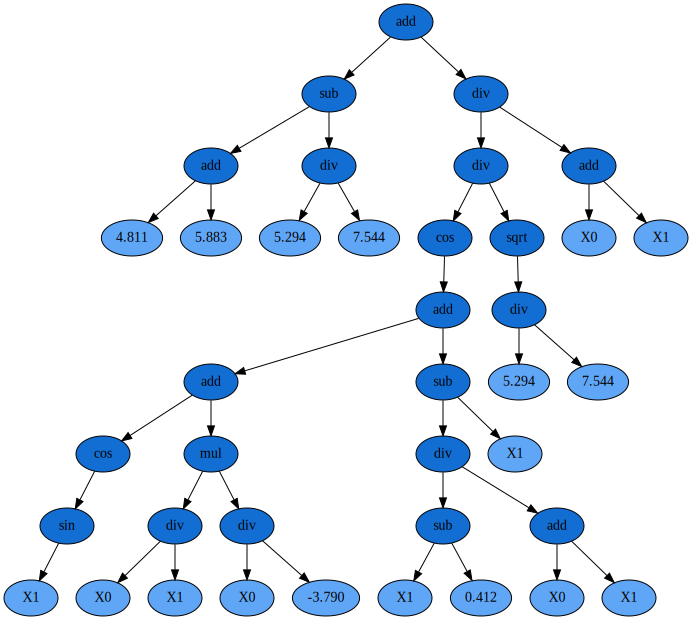

In [204]:
dot_data = est_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

# CENACE

## load the data

In [18]:
path_clima_var = Path().resolve().parent / "Data" / "consumo.xlsx"
clima = pd.read_excel(path_clima_var)[["fecha", "mín", "max", "Nubosidad"]]
clima = clima.set_index("fecha").loc["2007-01-01":"2020-03-30"]

In [ ]:
# mclima.iplot()
# px.scatter(clima[["mín"]])

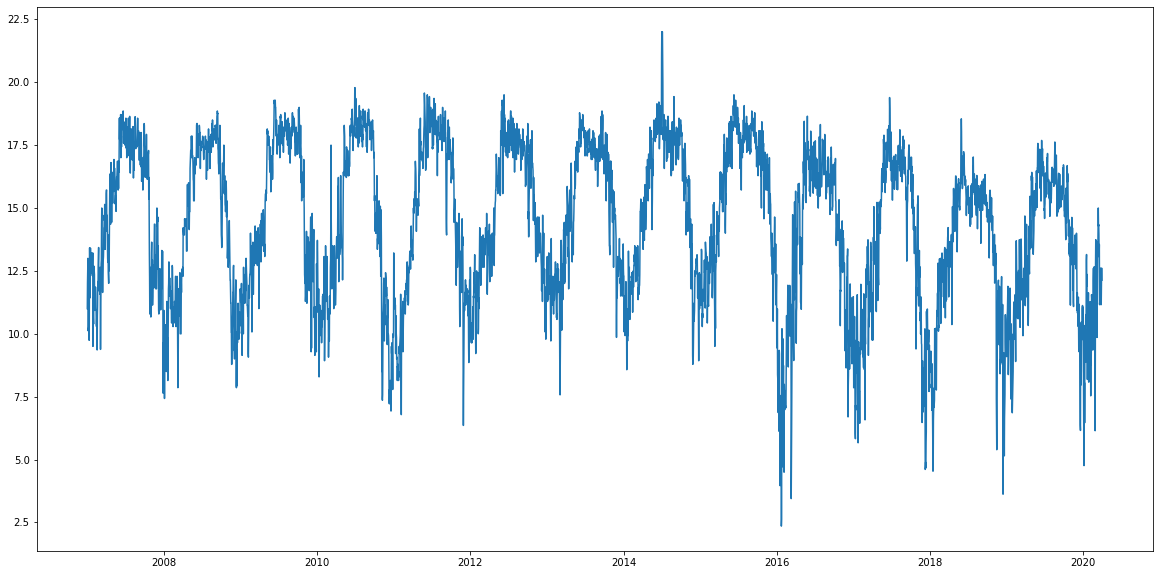

In [23]:
plt.figure(figsize = (20, 10))
plt.plot(clima[["mín"]]);